In [54]:
import pandas as pd
dataset = pd.read_csv('Master_data_speech.csv')
print(dataset.head())

   ID  Stimulus  Estimated  Error  Response Time  Unnamed: 5  Unnamed: 6  \
0  P1         5          5      0       2.098978         NaN         NaN   
1  P1         5          5      0       2.409855         NaN         NaN   
2  P1         2          3      1       3.807958         NaN         NaN   
3  P1         4          4      0       2.204942         NaN         NaN   
4  P1         2          2      0       1.664584         NaN         NaN   

  Unnamed: 7  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  


In [55]:
dataset.shape


(200, 8)

In [56]:
dataset.describe()


,Stimulus,Estimated,Error,Response Time,Unnamed: 5,Unnamed: 6
count,200.000000,200.000000,200.000000,200.000000,0.0,0.0
mean,2.805000,2.880000,0.245000,2.178653,NaN,NaN
std,1.462075,1.383899,0.475506,1.442957,NaN,NaN
min,1.000000,1.000000,0.000000,0.746456,NaN,NaN
25%,2.000000,2.000000,0.000000,1.358898,NaN,NaN
50%,2.500000,3.000000,0.000000,1.914797,NaN,NaN
75%,4.000000,4.000000,0.000000,2.508156,NaN,NaN
max,5.000000,5.000000,2.000000,14.109264,NaN,NaN


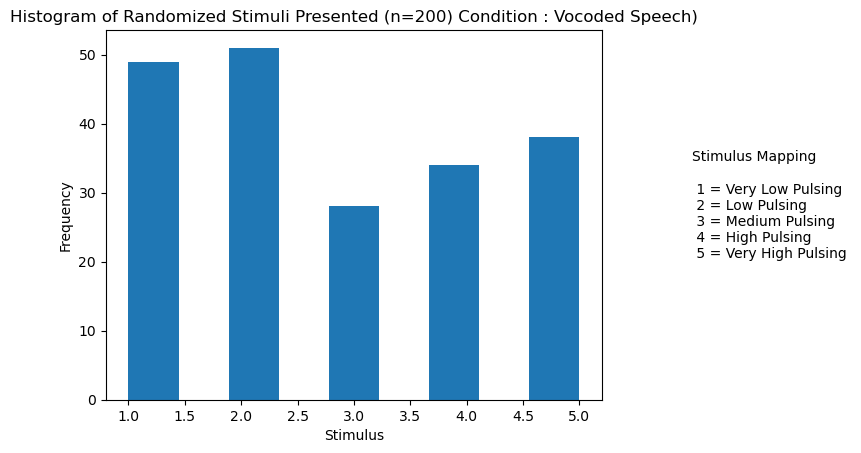

In [59]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# Plotting a histogram of distribution of stimuli

plt.hist(dataset['Stimulus'], bins='auto')
plt.xlabel('Stimulus')
plt.ylabel('Frequency')
plt.title('Histogram of Randomized Stimuli Presented (n=200) Condition : Vocoded Speech)')
plt.text(6, 20.5, "Stimulus Mapping \n\n 1 = Very Low Pulsing\n 2 = Low Pulsing\n 3 = Medium Pulsing\n 4 = High Pulsing \n 5 = Very High Pulsing ") 


plt.show()

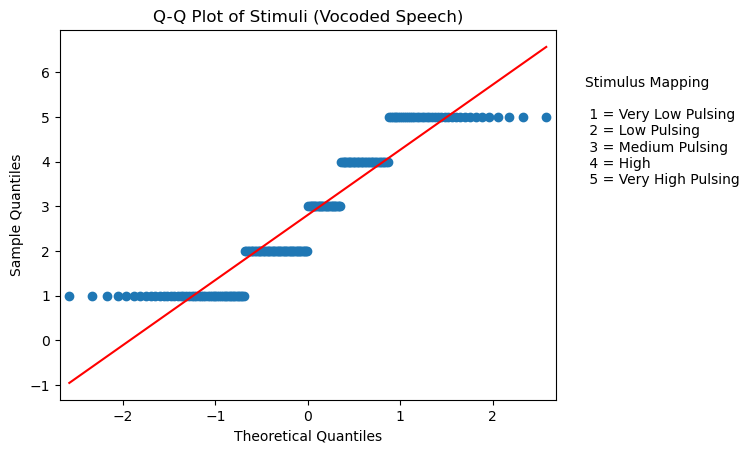

In [60]:
sm.qqplot(dataset['Stimulus'], line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Stimuli (Vocoded Speech)')
plt.text(3, 3.5, "Stimulus Mapping \n\n 1 = Very Low Pulsing\n 2 = Low Pulsing\n 3 = Medium Pulsing\n 4 = High \n 5 = Very High Pulsing ")

plt.show()

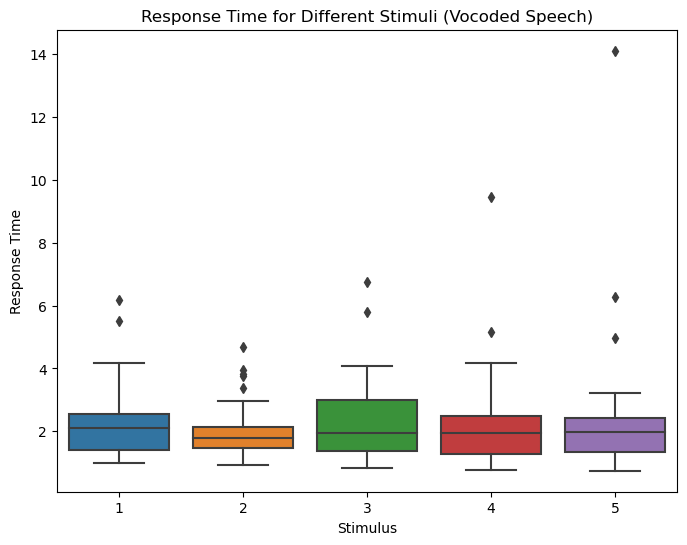

In [61]:
#Box plots: Create box plots to visualize the distribution of response time for each stimulus. 
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='Stimulus', y='Response Time')
plt.xlabel('Stimulus')
plt.ylabel('Response Time')
plt.title('Response Time for Different Stimuli (Vocoded Speech)')
plt.show()

In [62]:
#Analysis of variance (ANOVA): ANOVA test to determine if there are significant differences in the mean response time
#across different stimulus categories. To identify if there are any statistically signi0.0. vocothe spewa

import scipy.stats as stats
#Descriptive statistics: Calculating descriptive statistics such as mean, median, standard deviation, minimum, and 
#maximum response time for each stimulus category. Summary of the response time distribution for each 
#stimulus groups will be 

stimulus_groups = dataset.groupby('Stimulus')
stimulus_stats = stimulus_groups['Response Time'].describe()
print(stimulus_stats)

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*[group['Response Time'] for name, group in stimulus_groups])

alpha = 0.05
if p_value < alpha:
    print("There are significant differences in response time across different stimuli.")
else:
    print("There are no significant differences in response time across different stimuli.")


          count      mean       std       min       25%       50%       75%  \
Stimulus                                                                      
1          49.0  2.139190  1.048887  0.984879  1.418171  2.097075  2.563457   
2          51.0  1.940463  0.828091  0.942084  1.473875  1.777357  2.136175   
3          28.0  2.377684  1.402519  0.834586  1.387582  1.961004  3.002999   
4          34.0  2.206095  1.602242  0.783184  1.278778  1.947211  2.502778   
5          38.0  2.378006  2.228841  0.746456  1.334284  1.976209  2.425480   

                max  
Stimulus             
1          6.175355  
2          4.682494  
3          6.741750  
4          9.448763  
5         14.109264  
There are no significant differences in response time across different stimuli.


In [63]:
p_value

0.6137558970263932

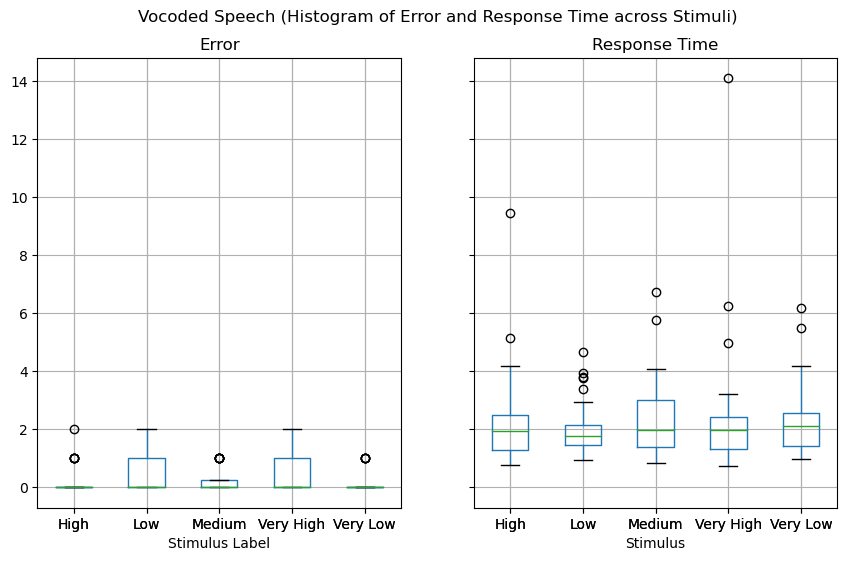

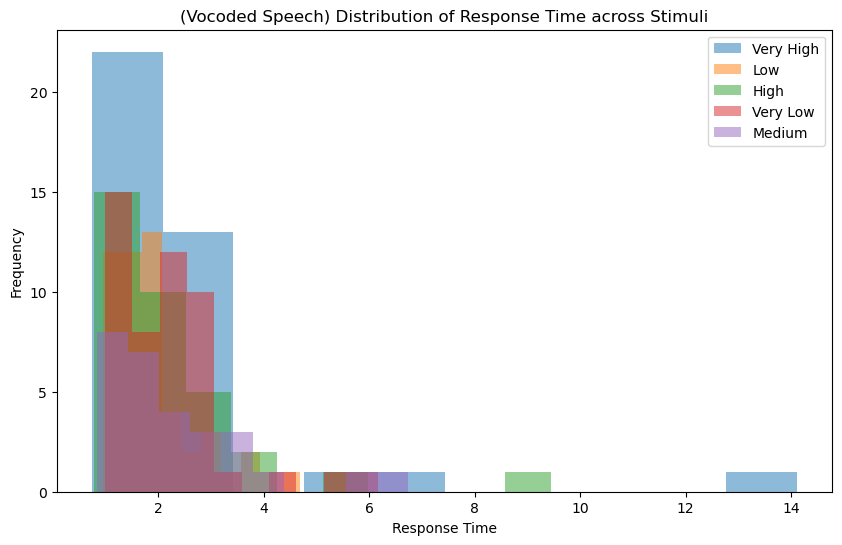

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Master_data_speech.csv')

# Dataset is loaded into a DataFrame named 'df'
grouped_data = df.groupby('Stimulus')
summary_stats = grouped_data[['Error', 'Response Time']].describe()

# Map stimulus values to labels
stimulus_labels = {
    1: 'Very Low',
    2: 'Low',
    3: 'Medium',
    4: 'High',
    5: 'Very High'
}

# Box plots for Error and Response Time
df['Stimulus Label'] = df['Stimulus'].map(stimulus_labels)
df.boxplot(column=['Error', 'Response Time'], by='Stimulus Label', figsize=(10, 6))
#plt.title('Distribution of Error and Response Time across Stimuli')
plt.xlabel('Stimulus')
plt.ylabel('Value')
plt.suptitle('Vocoded Speech (Histogram of Error and Response Time across Stimuli)')  # Remove the default title
plt.show()

stimuli = df['Stimulus'].unique()
# Histograms for Error
#plt.figure(figsize=(10, 6))
for stimulus in stimuli:
    stimulus_data = df[df['Stimulus'] == stimulus]['Error']
    #plt.hist(stimulus_data, bins=10, alpha=0.5, label=stimulus_labels[stimulus])

#plt.title('Distribution of Error across Stimuli')
#plt.xlabel('Error')
#plt.ylabel('Frequency')
#plt.legend()
#plt.show()

# Histograms for Response Time
plt.figure(figsize=(10, 6))
for stimulus in stimuli:
    stimulus_data = df[df['Stimulus'] == stimulus]['Response Time']
    plt.hist(stimulus_data, bins=10, alpha=0.5, label=stimulus_labels[stimulus])

plt.title('(Vocoded Speech) Distribution of Response Time across Stimuli')
plt.xlabel('Response Time')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [82]:
#Analysis of variance (ANOVA): ANOVA test to determine if there are significant differences in the mean error
#across different stimulus categories. To identify if there are any statistically significant variations between the stimulus groups.

import scipy.stats as stats

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*[group['Error'] for name, group in stimulus_groups])

alpha = 0.05
if p_value < alpha:
    print("There are significant differences in error across different stimuli.")
else:
    print("There are no significant differences in error across different stimuli.")



There are no significant differences in error across different stimuli.


In [83]:
p_value

0.08527520948170478

In [84]:
#Analysis of variance (ANOVA): ANOVA test to determine if there are significant differences in the mean response time
#across different stimulus categories. To identify if there are any statistically significant variations between the stimulus groups.

import scipy.stats as stats

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*[group['Response Time'] for name, group in stimulus_groups])

alpha = 0.05
if p_value < alpha:
    print("There are significant differences in response time across different stimuli.")
else:
    print("There are no significant differences in response time across different stimuli.")


There are no significant differences in response time across different stimuli.


In [85]:
p_value

0.6137558970263932

In [86]:
# Here I analyze the relationship between the "Error" column and the previous stimuli in dataset, I examine the data based 
#on the sequence of stimuli. Created a lagged column: Created a new column in dataset that represents the previous stimulus for each row. 
#This was achieved by shifting the values in the "Stimulus" column by one position.
dataset['Previous Stimulus'] = dataset['Stimulus'].shift(1)
#Group data and statistics Data grouped by "Previous Stimulus" column and mean calculated
grouped_data = dataset.groupby('Previous Stimulus')['Error'].mean()
print(grouped_data)

Previous Stimulus
1.0    0.166667
2.0    0.274510
3.0    0.285714
4.0    0.264706
5.0    0.263158
Name: Error, dtype: float64


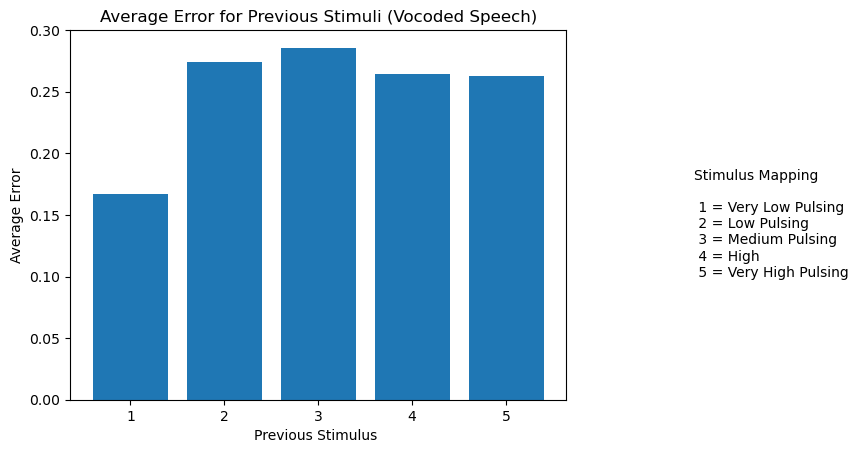

In [87]:
plt.bar(grouped_data.index, grouped_data)
plt.xlabel('Previous Stimulus ')
plt.ylabel('Average Error')
plt.title('Average Error for Previous Stimuli (Vocoded Speech)')
plt.text(7,0.1,"Stimulus Mapping \n\n 1 = Very Low Pulsing\n 2 = Low Pulsing\n 3 = Medium Pulsing\n 4 = High \n 5 = Very High Pulsing ")
plt.show()

In [88]:
#To determine if the error is influenced by the previous stimuli in dataset.
#average error for each stimulus category is compared based on the preceding stimulus. 
#Grouping the dataset by both the "Previous Stimulus" and "Stimulus" columns to then calculate
#the mean error for each combination.
grouped_data = dataset.groupby(['Previous Stimulus', 'Stimulus'])['Error'].mean()
print(grouped_data)

Previous Stimulus  Stimulus
1.0                1           0.071429
                   2           0.181818
                   3           0.000000
                   4           0.333333
                   5           0.222222
2.0                1           0.000000
                   2           0.500000
                   3           0.250000
                   4           0.111111
                   5           0.333333
3.0                1           0.285714
                   2           0.166667
                   3           0.000000
                   4           0.428571
                   5           0.500000
4.0                1           0.100000
                   2           0.333333
                   3           0.400000
                   4           0.000000
                   5           0.444444
5.0                1           0.100000
                   2           0.428571
                   3           0.500000
                   4           0.000000
            

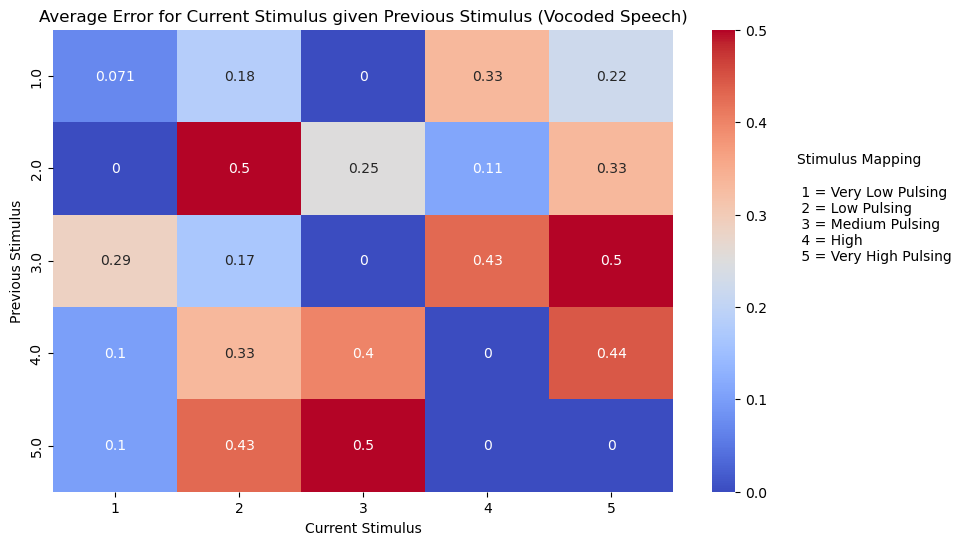

In [89]:
import seaborn as sns

# Reshape the data for plotting
heatmap_data = grouped_data.unstack()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True)
plt.xlabel('Current Stimulus')
plt.ylabel('Previous Stimulus')
plt.title('Average Error for Current Stimulus given Previous Stimulus (Vocoded Speech)')
plt.text(6.0,2.5,"Stimulus Mapping \n\n 1 = Very Low Pulsing\n 2 = Low Pulsing\n 3 = Medium Pulsing\n 4 = High \n 5 = Very High Pulsing")
plt.show()



